In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report)

### Dataset Description
The dataset has Number 768 sample records of patients. There are 8 features:


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction	
- Age: Years

Using these 8 predictor variables we need to predict the target variable 'Outcome'. It contains binary value: 1 if the patient has diabetes and 0 if the patient doesn't have diabetes.

In [12]:
dataset = pd.read_csv("diabetes.csv")

In [13]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Data Processing

In [14]:
X = dataset.drop('Outcome', axis=1).to_numpy()
y = dataset['Outcome'].to_numpy()

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=99)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training logistic Regression Model

In [40]:
logReg = LogisticRegression(class_weight= 'balanced', max_iter=500)
logReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [41]:
# Prediction

y_pred = logReg.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

### Evaluation Metrics

Now that we have predicted whether or not the patients in the test set have diabetes, let's evaluate how good is the prediction made by logistic regression. We can evaluate the performance of the classifier using various metrics. We will learn about the following metrics.
 
 
 - Confusion Matrix
 - Accuracy
 - Precision
 - Recall
 - F1-score 

All of these metrics are available in Scikit-Learn's [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) package  for [classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics).

Note: Confusion matrix is not a performance metric in itself but most of the other performance metrics can be derived from the confusion matrix.

The matrix displays the number of instances produced by the model on the test data.

- True positives (TP): occur when the model accurately predicts a positive data point.
- True negatives (TN): occur when the model accurately predicts a negative data point.
- False positives (FP): occur when the model predicts a positive data point incorrectly.
- False negatives (FN): occur when the model mispredicts a negative data point.

### 1. Accuracy
The simplest performance metric for classification models is accuracy, expressed as


$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} $$

It is the fraction of predictions that the classifier predicted correctly in the entire testing dataset. This metric only cares for the correct predictions while neglecting the false predictions. Thus is of interest in cases where true positives and true negatives have greater importance than false postitives and false negatives.

We can calculate the accuracy using the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.


In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Our model is {accuracy*100:.3f}% accurate")


Our model is 77.273% accurate


### Accuracy Paradox

<Axes: xlabel='Outcome'>

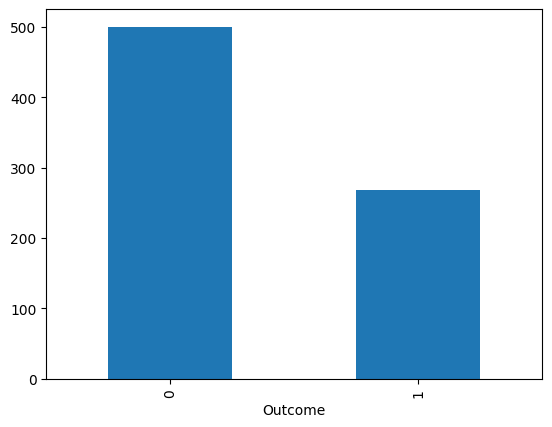

In [49]:
dataset['Outcome'].value_counts().plot.bar()

#### Metrics Confusion Matrix

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The matrix displays the number of instances produced by the model on the test data.

- True positives (TP): occur when the model accurately predicts a positive data point.
- True negatives (TN): occur when the model accurately predicts a negative data point.
- False positives (FP): occur when the model predicts a positive data point incorrectly.
- False negatives (FN): occur when the model mispredicts a negative data point.

In [43]:
cm = confusion_matrix(y_test, y_pred)

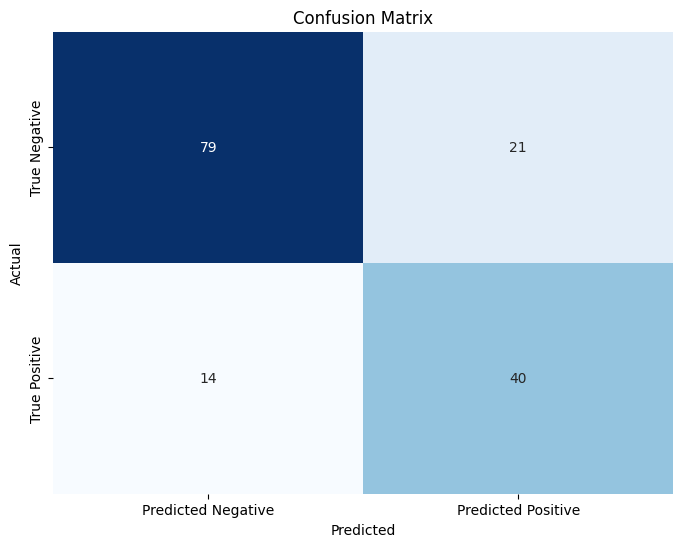

In [44]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<br>

### 2. Precision
Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model.

$$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}} $$

In [45]:
precision = precision_score(y_test, y_pred)
print(precision)

0.6557377049180327


### 3. Recall
Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.

$$\text{Recall} = \frac{\text{TP}}{\text{TP+FN}} $$

Note: We use precision when we want to minimize false positives, crucial in scenarios like spam email detection where misclassifying a non-spam message as spam is costly. And we use recall when minimizing false negatives is essential, as in medical diagnoses, where identifying all actual positive cases is critical, even if it results in some false positives.

In [46]:
recall = recall_score(y_test, y_pred)
print(recall)

0.7407407407407407


### 4. F1-Score
F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall,

$$\text{F1-Score} = \frac{\text{2*Precision*Recall}}{\text{Precision + Recall}} $$

We balance precision and recall with the F1-score when a trade-off between minimizing false positives and false negatives is necessary, such as in information retrieval systems.

In [47]:
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.6956521739130435
